<a href="https://colab.research.google.com/github/pabloomartin/deepLearning/blob/master/AA_PRACTICA2_GRUPO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Grupo 1
*   Pablo Martin Heras
*   Daniel Villarino Agueda

# <center>**Práctica 2:**
# <center>**Redes de Neuronas Convolucionales.**


## **1. Introducción**
En esta práctica crearemos un modelo de **Red de Neuronas Convolucionales** que sea capaz de reconocer y clasificar imágenes de ropa según sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. Para ello haremos uso de la función **Fashion-MNIST**, un conjunto de datos precargado en Keras que contiene las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos.

## **2. Desarrollo**
Para comenazar, importamos las librerías que vamos a utilizar en el desarrollo de la práctica, y nos aseguramos de que la versión de TensorFlow que se está ejecutando sea igual a 2.0.0 o mayor. 

In [ ]:
# IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
# Representamos la versión de keras
print(tf.keras.__version__)
# Representamos la GPU disponible
print("GPU Available:", tf.config.list_physical_devices('GPU'))
# Representamos la versión del tensorflow
print(tf.__version__)

# Importamos librerías que requeriremos mas adelante
from keras import models
from keras import layers

# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt

2.7.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.7.0


Como podemos observar la versión de TensorFlow y keras es la 2.7.0, por lo que podemos seguir con el desarrollo de la práctica.

Cargamos el conjunto de datos Fashion-MNIST en Keras.


*   ***`train_images`*** y ***`train_labels`*** son el conjunto de datos que el modelo usa para aprender.
*   ***`test_images`*** y ***`test_labels`*** son el conjunto de datos con los que probaremos al modelo ya entrenado.

In [ ]:
# CARGAMOS EL CONJUNTO DE DATOS FASHION_MINIST EN KERAS
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Incluimos los nombres de los artículos en un vector de 10 dimensiones, los cuales van asignados cada uno a una imagen del conjunto de datos. 


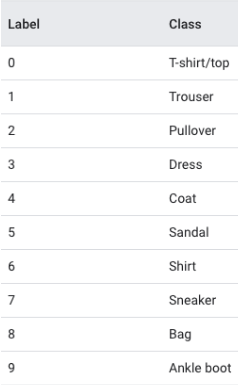


In [ ]:
class_names = ['Camiseta/top', 'Pantalón', 'Sudadera', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Mochila', 'Bota alta']

###**2.1 Análisis de los datos**
Comenzamos echando un vistazo a los datos de entrenamiento:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Podemos observar que contiene 60.000 imágenes de 28x28 píxeles

In [ ]:
len(train_labels)

60000

Cada imagen es un número entero del 0 al 9

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

A continuación veremos la imagen de las botas altas, por lo que excogeremos la posición 0 siguiendo el array mostrado anteriormente


In [ ]:
# Como ya sabemos, las botas altas corresponden con el número 9.
train_labels[0]

9

Dibujamos su matriz

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

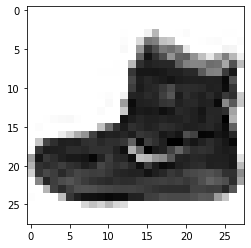

In [ ]:
# Veamos el elemento 0 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos los datos de prueba:

In [ ]:
test_images.shape

(10000, 28, 28)

En este caso tenemos un conjunto de 10.000 imágenes de 28x28 píxeles

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

###**2.2 Pre procesado de los datos**
Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Si inspeccionamos la primera imagen en el set de entrenamiento, encontramos que los valores de los pixeles estan entre 0 y 255:

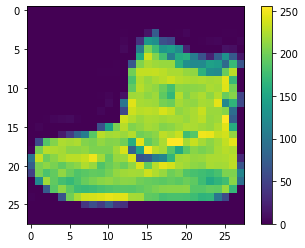

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de alimentar al modelo de la red neuronal, lo transformaremos en una matriz de forma float32 con forma `(60000, 28 * 28)` con valores entre 0 y 1.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

###**2.3 Construcción de la Red Neuronal Convolucional**.

####**Caso 1**

**Construir el modelo**

Lo primero que debemos entender es que es una red neuronal convolucional. Las redes neuronales convolucionales son redes que exclusivamente se usan en tareas relacionadas con Visión por Computador debido a los buenos resultados reconociendo imágenes. La función principal de las redes es clasificar y reconocer (a través de las distintas capas que definen las **CNNs**) las distintas partes presentes en las imágenes que se introducen por la entrada.

Cada parte de una Red Neuronal Convolucional está entrenada para realizar una tarea, por lo que el entrenamiento de cada una de las partes se desarrolla de manera individual y se efectúa más rápido. Estas redes se utilizan en especial para el análisis de imágenes.

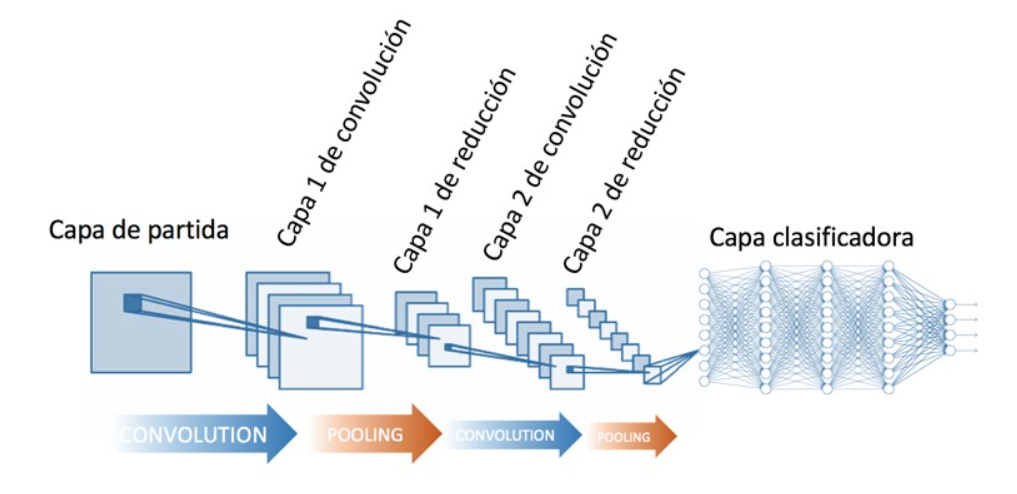

**Configurar las capas**

Estas capas que definen las CNNs son: 

*   una con grupos de neuronas especializadas en la operación **Convolución**
*   otras en **Pooling**.

Primeramente realizamos una operación Convolución, en la que el principal componente es la **capa convolucional** (la cual aprende patrones locales) capaz de detectar características en las imágenes (aristas, líneas, etc.) y una vez que las aprende, la capa es capaz de reconocer estas características en cualquier parte de la misma, así como, también es capaz de aprender jerarquías espaciales de patrones. 

Seguidamente realizamos la operación en Pooling, que suelen aplicarse después de las capas convolucionales. Consisten en simplificar y condensar la información obtenida en la capa convolucional. A pesar de que hay varias maneras de condensar la información, la más común, y la que utilizaremos será **max-pooling** (se queda con el mayor valor que encuentra en los datos).

En estas operaciones, una primera capa convolucional es la encargada de aprender elementos básicos como aristas, mientras que las segundas son capaces de aprender patrones compuestos de elementos básicos aprendidos en la capa anterior, y así constantemente hasta aprender patrones complejos. Además, las capas convolucionales actúan sobre tensores 3D, donde ajustas la altura, la anchura y el canal.

Nuestro primero grupo de capas está formado por:

*   **Nº Filtros:** 32
*   **Dimensión de la ventana capa convolucional:** 5 x 5
*   **Función de Activación:** ReLU
*   **Formato tensor entrada:** (28, 28, 1)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


Construimos una red **Deep** apilando capas.

Creamos un segundo grupo de capas formada por: 

*   **Nº Filtros:** 64
*   **Dimensión de la ventana capa convolucional:** 5 x 5
*   **Función de Activación:** ReLU
*   **Nº de canales de entrada**: 32 (viene de la capa anterior, Keras lo deduce)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2


La función `summary()` hace un resumen del modelo indicando las capas y lo que sale de cada capa.
Podemos comprobar con este método que esta capa no requiere parámetros para aplicar la transformación.

In [ ]:
model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


Inicialmente, nuestro caso 1, sin el uso de la capa Dense, estaba preparado para ejecutarse con 52.096 parémetros.

La primera capa que encontramos es la capa **Flatten**, que nos permite transformar el formato de las imágenes de un arreglo tri-dimensional (28x28x1), ya que las redes convolucionales funcionan con tres dimensiones, a unidimensional (784 pixeles). Esta capa no tiene unos parámetros establecidos previamente, únicamente reformatea el set de datos.

La salida de las capas Conv2D y maxPooling2D es un tensor 3D de forma 
(height, width, número de filtros). Las dimensiones width y height tienden a reducirse a medida que nos adentramos en las capas ocultas de la red neuronal. 
El número de filtros es controlado a través del primer argumento pasado a la 
capa Conv2D. 

El siguiente paso será crear una capa densamente conectada **Dense**, que servirá para alimentar una capa final de softmax para hacer la clasificación:

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

Observamos, que tras la inclusión de la capa Dense, nuestro caso 1 se ejecutará con 62.346 parámetros (dato obtenido con la función summary).

En el siguiente paso convertimos el tensor 2D en un tensor 3D, haciendo uso de la función **reshape**. Las capas convolucionales ya están preparadas 
para las imágenes (nuestra tercera dimensión será 1 porque solo tenemos un 
canal de color: b/n)

In [ ]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


**Entrenar el modelo**

Antes de conseguir ejecutar y compilar el modelo, es necesario agregar las
configuraciones que aparecen en este sector del código:
- **Loss function** : su objetivo es medir la exactitud del modelo y orientar en la dirección adecuada al modelo. En este caso utilizaremos la función *`'categorical_crossentropy'`*.
- **Optimizer**: el optimizador del modelo, que se irá actualizando a medida que
cambiemos el set de datos. En este caso utilizamos la función *`'sgd'`*.
- **Metrics**: monitorea los pasos de entrenamiento del modelo. Utilizamos la métrica *`'accurancy'`*.

El entrenamiento será el paso del proceso que nos ayudará a orientarnos y entender
si realmente lo que estamos llevando a cabo tiene buena pinta. Mediante el
entrenamiento el modelo aprende a asociar imágenes y etiquetas gracias a los arreglos
train_images y train_labels. Para comenzar el entrenamiento, utilizamos el método
model.fit, que nos ayuda a ajustar el modelo a el set de datos de entrenamiento.



In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)


Epoch 1/5
600/600 [==============================] - 13s 8ms/step - loss: 0.9576 - accuracy: 0.7454
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2486 - accuracy: 0.9279
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1755 - accuracy: 0.9492
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1412 - accuracy: 0.9589
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1199 - accuracy: 0.9650


Tras analizar el modelo de entrenamiento época por época, podemos observar que la pérdida es cada vez menor y que la precisión es cada vez mayor, hasta obtener la pérdida y la precisión definitiva.


**Evaluar la exactitud**

Las funciones test_loss y test_acc nos ayudarán a certificar la exactitud del 
modelo, con lo que podremos diferenciar si se ha producido un sobre entrenamiento. El sobre entrenamiento se produce cuando un modelo de aprendizaje de maquina tiene un rendimiento peor sobre un set de datos nuevo que nunca antes ha visto comparado con el de entrenamiento.

In [ ]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model1.evaluate(test_images, test_labels)

# Precisión del test
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1004 - accuracy: 0.9709

Test accuracy: 0.9708999991416931


Vemos que en nuestro modelo no se produce sobreentrenamiento y los valores de la función de pérdida y precisión son muy buenos, además de que son valores muy semejantes a los de entrenamiento.

**Predicciones**

Tras haber realizado el entrenamiento del modelo, procedemos a realizar predicciones
sobre las imágenes presentes en el modelo. Una prediccion es un arreglo de 10 numeros.
Estos representan el nivel de &quot;confianza&quot; del modelo sobre las imagenes de cada uno de los 10
articulos de moda/ropa.

In [ ]:
predictions = model1.predict(test_images)
predictions[5]

array([4.9303195e-05, 9.9285662e-01, 1.1220932e-04, 9.1611924e-05,
       1.1264168e-03, 3.2947114e-06, 3.5940197e-05, 4.9954611e-03,
       6.0356344e-04, 1.2550881e-04], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Dibujamos la predicción de la 6º figura. 

Podemos observar la probabilidad de que sea dicha imagen y una gráfica que nos devuelve la probabilidad que tiene cada imagen de ser la figara 6.

Antes de graficar la predicción debemos transformar los datos en una matriz de forma float32 con valores entre 0 y 1.

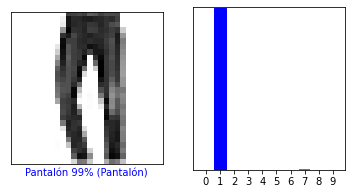

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 14 imágenes. 

Al igual que en el caso anterior, nos devuelve la imagen, la probabilidad de que sea dicha imagen y la probabilidad que tienen las demas imágenes de ser la figura 6.

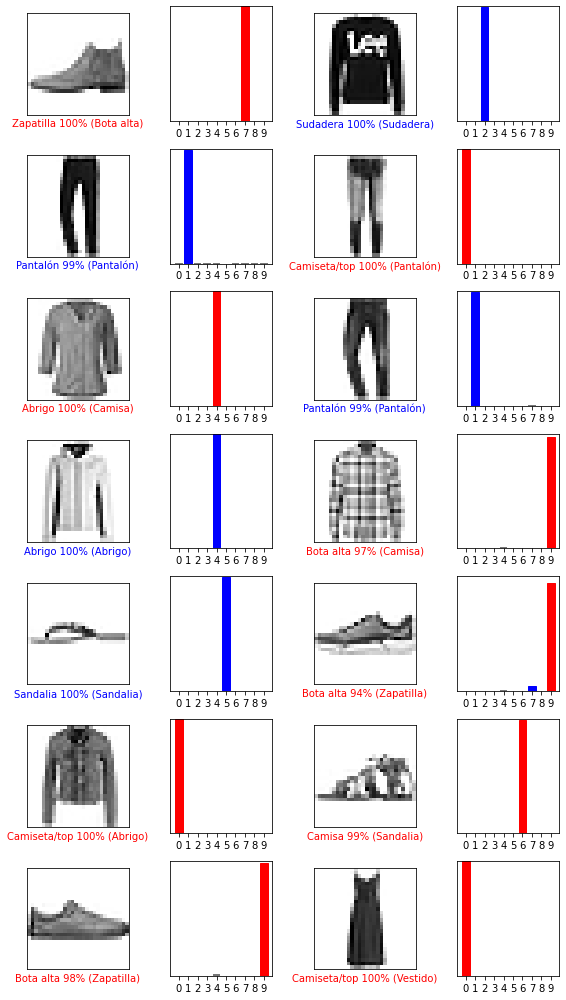

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Vemos que, a pesar de tener un modelo muy bien entrenado, las predicciones no son buenas, tanto que confunde, por ejemplo, una camiseta con una bota alta, con una precisión del 100%. 

**Análisis con 25 épocas de entrenamiento**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)
Epoch 1/25
600/600 [==============================] - 5s 8ms/step - loss: 0.9726 - accuracy: 0.7374
Epoch 2/25
600/600 [==============================] - 5s 8ms/step - loss: 0.2663 - accuracy: 0.9223
Epoch 3/25
600/600 [==============================] - 5s 8ms/step - loss: 0.1923 - accuracy: 0.9441
Epoch 4/25
600/600 [==============================] - 5s 8ms/step - loss: 0.1545 - accuracy: 0.9551
Epoch 5/25
600/600 [==============================] - 5s 8ms/step - loss: 0.1307 - accuracy: 0.9620
Epoch 6/25
600/600 [==============================] - 5s 8ms/step - loss: 0.1153 - accuracy: 0.9663
Epoch 7/25
600/600 [==============================] - 5s 8ms/step - loss: 0.1030 - accuracy: 0.9697
Epoch 8/25
600/600 [==============================] - 5s 8ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 9/25
600/600 [==============================] - 5s 8ms/step - loss: 0.0871 - accuracy: 0.9744
Epoch 10/25
600/600 [=======================

In [ ]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model1.evaluate(test_images, test_labels)

# Precisión del test
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0432 - accuracy: 0.9860

Test accuracy: 0.9860000014305115


Como podemos observar, al introducir más épocas la función de pérdida y la precisión son mejores en el modelo de prueba. Además, los valores al testear el modelo son bastante semejantes, apreciándose una leve mejora tanto en la función de pérdida como en la precisión.

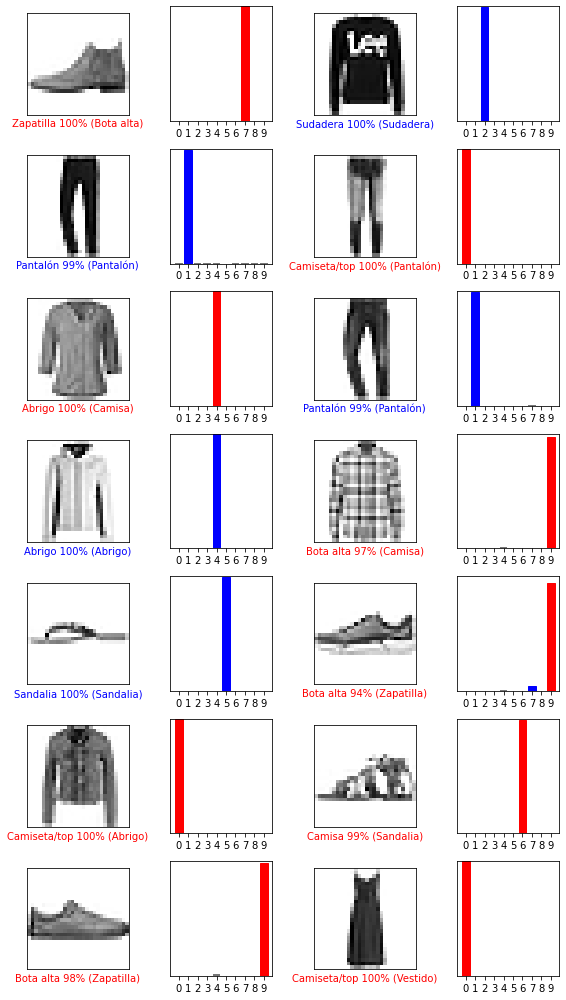

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

A pesar de que el modelo mejore, al graficar las prendas de ropa sigue fallando.

**Análisis haciendo uso de la función de activación tanh** 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (5, 5), activation='tanh'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)
Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 0.9508 - accuracy: 0.7826
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3457 - accuracy: 0.9040
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2676 - accuracy: 0.9246
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2218 - accuracy: 0.9381
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1896 - accuracy: 0.9468


Con la introducción de la función de activación 'tanh' en vez de la función de activación 'relu', observamos que obtenemos un modelo menos preciso  y con una mayor función de pérdida que el anterior (con 5 épocas).

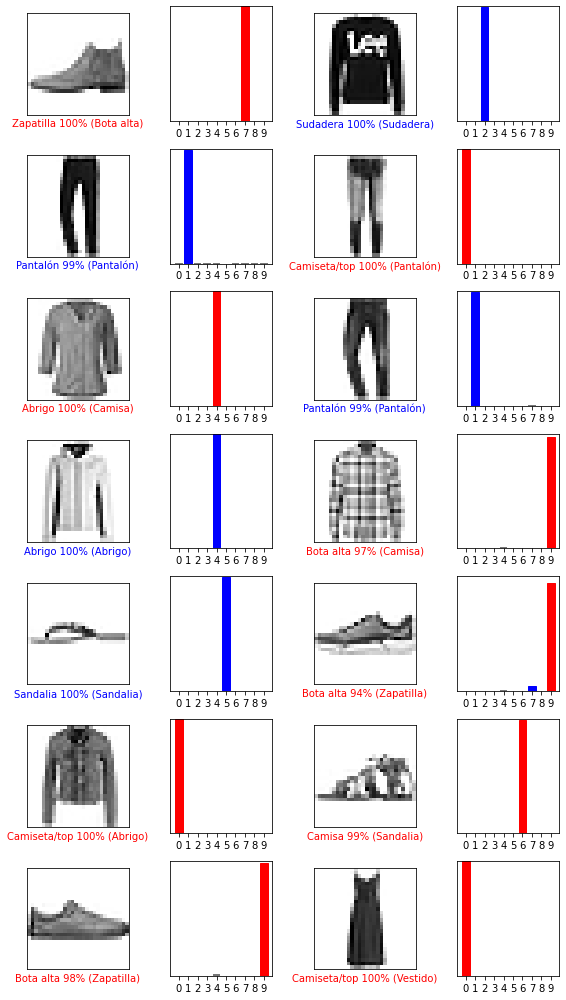

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####**Caso 2**

**Configurar las capas**

Nuestro primero grupo de capas está formado por:

*   **Nº Filtros:** 64
*   **Dimensión de la ventana capa convolucional:** 7 x 7
*   **Función de Activación:** ReLU
*   **Formato tensor entrada:** (28, 28, 1)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding = 'same' ))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


Creamos un segundo grupo de capas formada por: 

*   **Nº Filtros:** 128
*   **Dimensión de la ventana capa convolucional:** 3 x 3
*   **Función de Activación:** ReLU
*   **Nº de canales de entrada**: 64 (viene de la capa anterior, Keras lo deduce)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2

In [ ]:
model2.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


Inicialmente, nuestro caso 2, sin el uso de la capa Dense, estaba preparado para ejecutarse con 77.056 parémetros.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

Observamos, que tras la inclusión de la capa Dense, nuestro caso 2 se ejecutará con 97.546 parámetros (dato obtenido con la función summary).

In [ ]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


**Entrenar el modelo**

- **Loss function** : Utilizaremos la función *`'categorical_crossentropy'`*.
- **Optimizer**: Utilizamos la función *`'sgd'`*.
- **Metrics**: Utilizamos la métrica *`'accurancy'`*.

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)


Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.9729 - accuracy: 0.7190
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2905 - accuracy: 0.9125
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2004 - accuracy: 0.9405
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.1497 - accuracy: 0.9558
Epoch 5/5
600/600 [==============================] - 7s 12ms/step - loss: 0.1204 - accuracy: 0.9643


Tras analizar el modelo de entrenamiento época por época en este segundo caso, podemos observar que, al igual que en el caso 1, la pérdida es cada vez menor y que la precisión es cada vez mayor, hasta obtener la pérdida y la precisión definitiva, y que en la primera época la función de pérdida es bastante elevada mientras que la precisión no es muy alta, aunque es más considerable en este segundo caso.

In [ ]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model2.evaluate(test_images, test_labels)

# Precisión del test
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1004 - accuracy: 0.9710

Test accuracy: 0.9710000157356262


La precisión presente en este segundo caso es, al igual que en el primero, aproximadamente 97%.

**Predicciones**

In [ ]:
predictions = model1.predict(test_images)
predictions[5]

array([2.0958094e-05, 9.9279791e-01, 1.2223193e-04, 9.2245165e-05,
       1.5877496e-03, 5.4262509e-06, 8.6797496e-05, 4.7929650e-03,
       2.5964249e-04, 2.3415910e-04], dtype=float32)

Dibujamos la predicción de la 6º figura. 


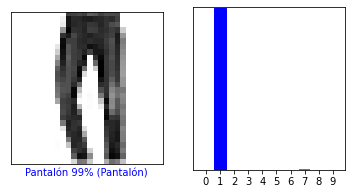

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 14 imágenes.

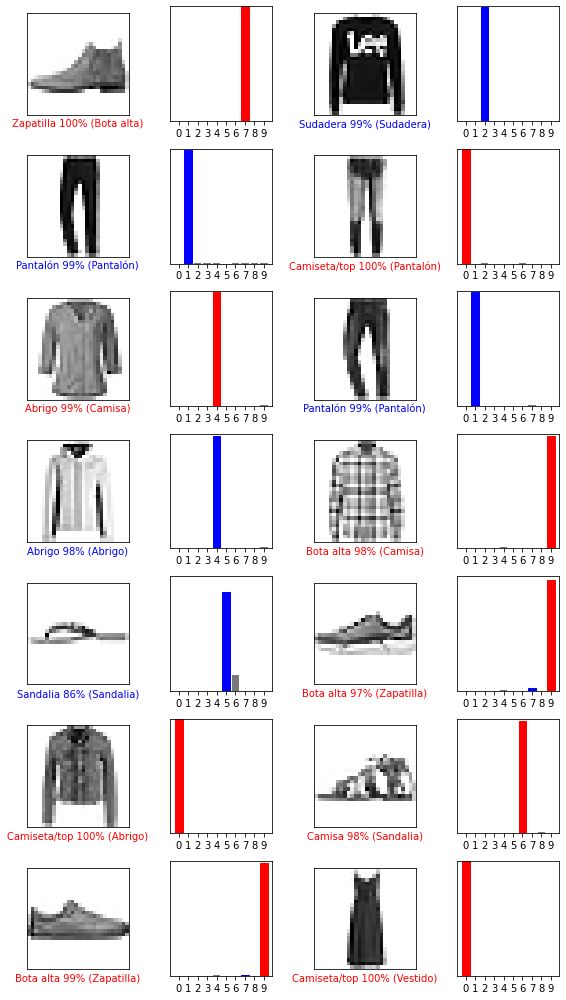

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Las gráficas siguen siendo erróneas al igual que en el primer caso.

####**Caso 3**

**Configurar las capas**

Nuestro primero grupo de capas está formado por:

*   **Nº Filtros:** 64
*   **Dimensión de la ventana capa convolucional:** 7 x 7
*   **Función de Activación:** ReLU
*   **Formato tensor entrada:** (28, 28, 1)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding = 'same'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


Creamos un segundo grupo de capas formada por: 

*   **Nº Filtros:** 128
*   **Dimensión de la ventana capa convolucional:** 3 x 3
*   **Función de Activación:** ReLU
*   **Nº de canales de entrada**: 64 (viene de la capa anterior, Keras lo deduce)
*   **Tamaño de ventana en la capa de pooling:** max-pooling en una ventana 2 x 2

In [ ]:
model3.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


Inicialmente, nuestro caso 3, sin el uso de la capa Dense, estaba preparado para ejecutarse con 77.056 parémetros.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

Observamos, que tras la inclusión de la capa Dense, nuestro caso 3 se ejecutará con 97.546 parámetros (dato obtenido con la función summary).

In [ ]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


**Entrenar el modelo**

- **Loss function** : Utilizaremos la función *`'categorical_crossentropy'`*.
- **Optimizer**: Utilizamos la función *`'adam'`*.
- **Metrics**: Utilizamos la métrica *`'accurancy'`*.

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)


Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.1637 - accuracy: 0.9498
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0486 - accuracy: 0.9850
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0326 - accuracy: 0.9894
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0198 - accuracy: 0.9937


En este caso, a diferencia del 1 y el 2, el modelo no comienza con una función de pérdida elevada y una precisión común, sino que desde la primera época es capaz de garantizar excelentes resultados, obteniendo en la última casi una precisión del 100%.

In [ ]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model3.evaluate(test_images, test_labels)

# Precisión del test
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0294 - accuracy: 0.9913

Test accuracy: 0.9912999868392944


Como hemos mencionado previamente, la precisión de este modelo es casi perfecta. Además no se produce sobreentrenamiento, lo que a priori nos hace pensar que tenemos un modelo casi perfecto.

**Predicciones**

In [ ]:
predictions = model1.predict(test_images)
predictions[5]

array([4.2468200e-05, 9.8798800e-01, 8.2462648e-04, 9.7679556e-04,
       7.2532956e-04, 6.1417857e-05, 2.1042892e-04, 6.7454586e-03,
       1.8851217e-03, 5.4027740e-04], dtype=float32)

Dibujamos la predicción de la 6º figura.

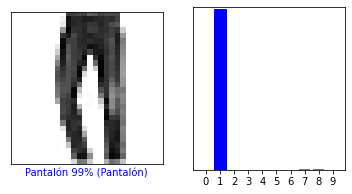

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 14 imágenes.

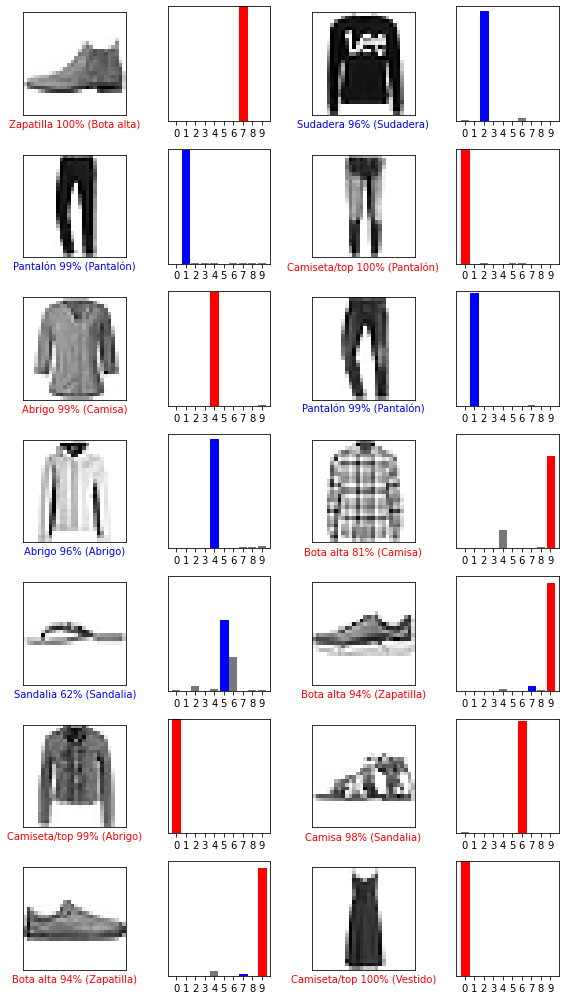

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

A pesar de tener un modelo casi perfectamente entrenado, las gráficas siguen siendo erróneas. 

Algo que resulta muy curioso es que, a medida que avanzamos en los casos y mejoramos el modelo, la sandalia, situada en la posición 9, pierde precisión, lo que resulta bastante incoherente, mientras que la camisa, situada en la posición 8, gana precisión a pesar de que siga saliendo un resultado erróneo.

## **3. Batch_normalization y Dropout**

*   **Batch Normalization:** Batch normalization es un metodo que **normaliza** cada lote de datos (bath_size). Como vimos al principio de la práctica, una imagen a color tiene valores de 0 hasta 255. Normalizando los datos las distancias de los datos van de 0 a 1 y esto ayuda a la red neuronal a trabajar mejor y a tener menos problemas, pero cuando normalizamos los datos solo la capa de entrada se beneficia de esto, conforme los datos pasan por otras capas ocultas esta normalización se va perdiendo y si tenemos una red neuronal con muchas capas, como es el caso de las **Redes Concolucionales**, podemos tener problemas con el entrenamiento. El metodo de batch normalization normaliza los datos antes de que pasen por la función de activación en cada capa que de la red neuronal, de esta manera siempre tendremos los datos normalizados.
Esto es algo que podría resultar determinante en nuestra práctica, ya que el problema de las predicciones puede venir dado pero el no uso de este concepto, y nos puede ayudar en la mejora de nuestro modelos.

*   **Dropout:** la capa de dropout establece aleatoriamente las unidades de entrada en 0 con una frecuencia establecida que ayuda a evitar el **sobreajuste**. Las entradas que no están configuradas en 0 se establecen en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia. Solo se usa en el entrenamiento, de modo que no se eliminan valores durante la inferencia.
Esto es un método que siempre vienen bien implementar ya que nos evitamos problemas con el sobreentrenamiento, aunque en nuestro modelos no hemos tenido problemas de este tipo.




## **4. Callbacks**


*   **CallBacks**: se utiliza en distintas fases durante el entrenamiento (ejemplo, antes o después de un lote). Se utilizan para guardar el modelo, pararlo pronto, poder ver las estadísticas internas del modelo durante el entrenamiento, para escribir registros de TensorBoard después de cada lote de entrenamiento para monitorear tus métricas. 
Este concepto nos podría resultar muy util a la hora de mejorar nuestros modelos, ya que podemos observar como se comporta durante el entrenamiento y ver los puntos fuertes y débiles de nuestro modelo.


## **5. Conclusión**

En conclusión, con este trabajo hemos conseguido familiarizarnos con el concepto de red neuronal convolucional y de como se puede aplicar correctamente en una empresa digital como es Zalando.

Al igual que en la práctica anterior, cuantas más epocas de entrenamiento llevamos a cabo mejor resultado nos ofrece el modelo, sin llegar en ningún caso a un sobreentrenamiento.

Además, hemos conseguido ver que en aquellos casos que cuentan con más capas dense (el 2 y el 3, mayor número de parámetros con los que actuar) nos aportan un mejor resultado. Y, en el caso en el que utilizamos el optimizador 'adam' en lugar del optimizador 'sgd' obtenemos la menor función de pérdida y la mayor precisión.

Por tanto, el mejor modelo es el caso 3 al contar con casi un 99% de precisión utilizando las 2 capas dense de neuronas y el optimizador 'adam', y sería el ideal en caso de tener que aplicar uno en la empresa.

A pesar de los buenos resultados a la hora de realizar el entrenamiento, hemos observado unos malos resultados a la hora de realizar las predicciones. Esto es algo que nos resulta nuevo, ya que siempre hemos relacionado unos buenos resultados en el proceso de entrenamiento con unos buenos resultados a la hora de realizar las predicciones, y hemos visto que no es así. Además es algo que resulta muy extraño, ya que las redes convolucionales están especializadas en la predicción de imágenes.

Si comparamos las Redes Neuronales Artificiales con las Redes Neuronales Convolucionales, vemos que las convolucionales ofrecen un mayor rendimiento en el proceso de entrenamiento, llegando a funciones de pérdida más bajas y a unas precisiones muy elevadas, rozando el 100%. Esto se debe al aumento de las capas por las que pasa la información, lo que permite un mejor análisis de las imágenes. Esto afecta en el aumento del tiempo de entrenamiento. 

Sin embargo, los resultados de las predicciones de las Redes Concolucionales dejan mucho que desear, ya que parece que predice muy bien algunas imágenes pero tiene un gran porcentaje de fallo. 

En este caso, a pesar del aumento de las capas en el caso de las redes convolucionales, nos quedamos con las redes artificiales, ya que, aunque ofrezcan peores resultados en el proceso de entrenamiento, aciertan la gran mayoria de las predicciones, aunque sea con un porcentaje no muy alto.


## **6. Bibliografía**
[1] "Dropout y Batch Normalization". 9/11/18. En: Vicente Rodríguez Blog. Disponible en:

https://vincentblog.xyz/posts/dropout-y-batch-normalization

[2] "Dropout layer". En: keras.io. Disponible en:

https://keras.io/api/layers/regularization_layers/dropout/

[3] "CallBacks API". En: keras.io. Disponible en:

https://keras.io/api/callbacks/

[4] "Redes Neuronales Convolucionales en el reconocimiento de imágenes". bravent. Disponible en: 

https://www.bravent.net/redes-neuronales-convolucionales-en-el-reconocimiento-de-imagenes/